In [94]:
import pandas as pd
import numpy as np
import json
from polyglot.text import Text
from polyglot.downloader import downloader
from textblob import TextBlob
import nltk
import timestring
from datetime import datetime
import plotly.plotly as py
import plotly.graph_objs as go

import simplejson

In [220]:
tweets=pd.read_csv('datasets/facebook/allpost.csv')

In [221]:
mapp = {153080620724: 'Donald Trump', 124955570892789: 'Bernie Sanders', 889307941125736: 'Hillary Clinton'}
def map_names(x):
    if x in mapp:
        return mapp[x]
    else:
        return 0

In [222]:
tweets['displayName'] = tweets.from_id.apply(lambda x: map_names(x))

In [223]:
tweets.displayName.unique()

array(['Donald Trump', 'Bernie Sanders', 0, 'Hillary Clinton'], dtype=object)

In [224]:
tweets = tweets[tweets.displayName != 0]

In [225]:
tweets.shape

(2457, 28)

In [226]:
tweets.displayName.unique()

array(['Donald Trump', 'Bernie Sanders', 'Hillary Clinton'], dtype=object)

In [227]:
tweets = tweets[['created_time', 'displayName', 'message']]

In [228]:
tweets.created_time.head(1)

0    2009-04-16 22:05:34
Name: created_time, dtype: object

In [229]:
tweets = tweets[~pd.isnull(tweets.created_time) & ~pd.isnull(tweets.message)]

In [230]:
[x for x in tweets['created_time'] if not isinstance(x, str)]

[]

In [231]:
tweets['postedTime'] = tweets.created_time.apply(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [232]:
type(tweets.ix[2]['postedTime'])

pandas.tslib.Timestamp

In [233]:
tweets.head(2)

,created_time,displayName,message,postedTime
0,2009-04-16 22:05:34,Donald Trump,Watch Donald J. Trump on Larry King Live: http...,2009-04-16 22:05:34
1,2009-04-25 04:05:37,Donald Trump,Read a Q&A with Donald Trump @ Time.com: http:...,2009-04-25 04:05:37


In [186]:
def get_entity_sentiment(e):
    try:
        pos=e.positive_sentiment
        neg=e.negative_sentiment
        return pos,neg
    except:
        return '',''
def get_sentiment(t):
    blob = TextBlob(str(t).decode('utf-8'))
    return map(lambda s:s.sentiment.polarity,blob.sentences)
def get_noun_phrases(t):
    blob = TextBlob(str(t).decode('utf-8'))
    return list(blob.noun_phrases)
def map_entity(e):
    pos,neg=get_entity_sentiment(e)
    return {'tag':e.tag,'entity':" ".join(e),'pos':pos,'neg':neg}
def get_entites(text):
    try:
        polyglot_text=Text(text)
        entities=polyglot_text.entities
        return map(map_entity,entities)
    except:
        return []
     
def map_to_data(tweet):
    user_name=tweet['user']['name']
    text=tweet['text']
    return {'text':text,'user':user_name,'entities':get_entites(text),'sentiment':get_sentiment(text),'noun_phrases':get_noun_phrases(text)}

In [187]:
tweets['entities']=tweets['message'].map(get_entites)

In [95]:
import requests

url = "http://api.meaningcloud.com/class-1.1"
headers = {'content-type': 'application/x-www-form-urlencoded'}

iptc = []

for row_id, row in tweets.iterrows():
    print row_id
    payload = "key=9b45d20a6a1e99a054fb10c23e0b1695&txt={}&model=IPTC_en".format(row['message'])
    response = requests.request("POST", url, data=payload, headers=headers)
    iptc.append(simplejson.loads(response.text))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [188]:
len(iptc)

2180

In [234]:
tweets.shape

(2180, 4)

In [235]:
tweets['ontology'] = iptc

In [236]:
tweets

,created_time,displayName,message,postedTime,ontology
0,2009-04-16 22:05:34,Donald Trump,Watch Donald J. Trump on Larry King Live: http...,2009-04-16 22:05:34,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."
1,2009-04-25 04:05:37,Donald Trump,Read a Q&A with Donald Trump @ Time.com: http:...,2009-04-25 04:05:37,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."
2,2009-05-03 23:11:29,Donald Trump,- Do you think Joan Rivers will return to The ...,2009-05-03 23:11:29,{u'status': {u'msg': u'Request rate limit exce...
3,2009-04-29 22:33:29,Donald Trump,Watch an interview with Donald Trump on CNBC:\...,2009-04-29 22:33:29,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."
4,2009-04-27 21:33:00,Donald Trump,- Watch an interview with Donald Trump on CNN:...,2009-04-27 21:33:00,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."
5,2009-05-07 01:08:21,Donald Trump,- Watch Donald Trump read the Top Ten List on ...,2009-05-07 01:08:21,{u'status': {u'msg': u'Request rate limit exce...
6,2009-05-11 02:19:23,Donald Trump,- Who do you think is going to be The Celebrit...,2009-05-11 02:19:23,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."
7,2009-05-11 10:01:14,Donald Trump,- Congratulations Joan Rivers - The New Celebr...,2009-05-11 10:01:14,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."
8,2009-04-27 00:29:13,Donald Trump,- Who do you hope gets fired from Celebrity Ap...,2009-04-27 00:29:13,{u'status': {u'msg': u'Request rate limit exce...
9,2009-05-15 20:47:50,Donald Trump,"Enter the ""Think Like A Champion"" signed book ...",2009-05-15 20:47:50,"{u'status': {u'msg': u'OK', u'credits': u'1', ..."


In [237]:
tweets.to_pickle('datasets/facebook/allpost_with_ontology.pkl')

In [242]:
tweets = pd.read_pickle('datasets/facebook/allpost_with_ontology.pkl')

In [118]:
tweets['sentiment']=tweets['message'].map(get_sentiment)

In [79]:
tweets['noun_phrases']=tweets['message'].map(get_noun_phrases)

In [129]:
tweets['mean_sentiment']=tweets['sentiment'].map(lambda s:reduce(lambda x, y: x + y, s) / len(s))


In [ ]:
tweets['postedTime_datetime']=tweets['postedTime'].map(lambda x:pd.to_datetime(str(timestring.Date(x))))
tweets['postedTime_datetime']=pd.DatetimeIndex(tweets['postedTime'])

In [123]:
tweets['displayName']=tweets['displayName'].replace('Senator Ted Cruz','Ted Cruz')
tweets['day']=tweets['postedTime'].map(lambda x:x.date())
tweets['week']=tweets['day'].map(lambda x:x.isocalendar()[1])

In [82]:
tweets.to_csv('datasets/facebook_post_with_desc.csv')

In [155]:
tweets2015= tweets[tweets.postedTime > datetime(2015, 1, 1, 1, 1, 1, 1)]

In [102]:
tweets=pd.DataFrame.from_csv('datasets/facebook_post_with_desc.csv')

In [156]:
dataToCorelation={}
candidates=['Bernie Sanders', 'Donald Trump', 'Hillary Clinton']
for candidate in candidates:
    candidateTweets=tweets2015[tweets2015['displayName']==candidate]
    
    dataToCorelation[candidate]=candidateTweets[['mean_sentiment','day']].groupby(['day']).mean().reset_index()

In [157]:
cols=[]
headers=[]
dates=[]
for k,v in dataToCorelation.iteritems():
    v[k]=v['mean_sentiment']
    dates.append(list(v['day']))
    cols.append(list(v[k]))
    headers.append(k+' Facebook')

In [158]:
dates

[[datetime.date(2016, 1, 30),
  datetime.date(2016, 1, 31),
  datetime.date(2016, 2, 1),
  datetime.date(2016, 2, 2),
  datetime.date(2016, 2, 3),
  datetime.date(2016, 2, 4),
  datetime.date(2016, 2, 5),
  datetime.date(2016, 2, 6),
  datetime.date(2016, 2, 7),
  datetime.date(2016, 2, 8),
  datetime.date(2016, 2, 9),
  datetime.date(2016, 2, 10),
  datetime.date(2016, 2, 11),
  datetime.date(2016, 2, 12),
  datetime.date(2016, 2, 13),
  datetime.date(2016, 2, 14),
  datetime.date(2016, 2, 15),
  datetime.date(2016, 2, 16),
  datetime.date(2016, 2, 17),
  datetime.date(2016, 2, 18),
  datetime.date(2016, 2, 19),
  datetime.date(2016, 2, 20),
  datetime.date(2016, 2, 21),
  datetime.date(2016, 2, 22),
  datetime.date(2016, 2, 23),
  datetime.date(2016, 2, 24),
  datetime.date(2016, 2, 25)],
 [datetime.date(2015, 1, 4),
  datetime.date(2015, 1, 8),
  datetime.date(2015, 1, 12),
  datetime.date(2015, 1, 14),
  datetime.date(2015, 1, 15),
  datetime.date(2015, 1, 21),
  datetime.date(2015

In [159]:
import pickle
pickle.dump((cols,headers,dates),open('corelation_facebook.p','wb'))

In [160]:
candidates=set(tweets['displayName'])

In [161]:
candidates

{'Bernie Sanders', 'Donald Trump', 'Hillary Clinton'}

In [164]:
tweets = tweets2015

In [165]:
data={}
traces=[]

for candidate in candidates:
    candidateTweets=tweets[tweets['displayName']==candidate]
    sentimentData=candidateTweets[['mean_sentiment','day']]
    data[candidate]=sentimentData
    sentimentData['day']=pd.to_datetime(sentimentData['day'])
    sentimentData.set_index(sentimentData['day'],inplace=True)
    sentimentDataToSave=sentimentData.resample("1d").mean().fillna(0).rolling(window=7, win_type='triang').mean()
    print candidate+': '+str(sentimentDataToSave['mean_sentiment'].std())
    sentimentDataToSave.to_csv('facebook_posts_sentiment/'+candidate+'.csv')
    traces.append(
        go.Scatter(
            x = sentimentDataToSave.index,
            y = sentimentDataToSave['mean_sentiment'],
            mode = 'lines',
            name = candidate
        )
    )
    

Donald Trump: 0.039366749858
Bernie Sanders: 0.0532940152287
Hillary Clinton: 0.058668449043


/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [166]:
import plotly.plotly as py
import plotly.graph_objs as go

py.sign_in('RomanBartusiak', 'c10jv3qe0b')
py.iplot(traces, filename='scatter-mode')
   

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:122: InsecurePlatformWarning:

A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. You can upgrade to a newer version of Python to solve this. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.



In [95]:
downloader.download('ner2.sco',download_dir='/root/polyglot_data')

[polyglot_data] Error loading ner2.sco: Package u'ner2.sco' not found
[polyglot_data]     in index


False

NameError: name 'tweet' is not defined

In [139]:
entities_count = {}

In [126]:
# {for k, v tweets['entities']}

In [140]:
for row_id, tweet in tweets.iterrows():
    for ent in tweet['entities']:
        e = ent['entity']
        if e not in entities_count:
            entities_count.update({e: 1})
        else:
            entities_count[e] += 1

In [181]:
entities_count = {k.strip().encode('ascii','ignore'):v for k, v in entities_count.iteritems() if len(k) > 2 and v > 4}

In [182]:
entities_count

{': New Hampshire': 6,
 'ABC': 47,
 'ACA': 6,
 'AMERICA': 32,
 'AMERICA SAFE': 5,
 'Aberdeen': 6,
 'Adam': 16,
 'Affordable': 12,
 'Afghanistan': 10,
 'Aiken': 5,
 'Alabama': 34,
 'Alaska': 10,
 'Alberto Gonzales': 5,
 'America': 757,
 "America's": 7,
 'American': 60,
 'American Airlines Center': 5,
 'Ames': 16,
 'Ames , Iowa': 6,
 'Amir Hekmati': 5,
 'Amnesty': 6,
 'Anderson': 8,
 'Antonin Scalia': 7,
 'Apple': 7,
 'Arizona': 49,
 'Arkansas': 12,
 'Arnold': 5,
 'Assad': 6,
 'Atlanta': 24,
 'Austin': 5,
 'BET': 8,
 'BUSH': 7,
 'Baltimore': 11,
 'Barack Obama': 18,
 'Barbara Walters': 5,
 'Beijing': 8,
 'Ben': 11,
 'Ben Carson': 22,
 'Benghazi': 17,
 'Bern': 31,
 'Bernie': 314,
 'Bernie Sanders': 331,
 "Bernie Sanders's": 7,
 'BernieSanders': 25,
 'Biden': 9,
 'Big Pharma': 9,
 'Bill': 12,
 'Bill Clinton': 8,
 "Bill O'Reilly": 9,
 'Birmingham': 8,
 'Bloomberg': 8,
 'Bluffs , Iowa': 5,
 'Bob': 8,
 'Bob Vander Plaats': 7,
 'Bobby Knight': 7,
 'Boehner': 7,
 'Boston': 17,
 'Boulder': 5,
 '

In [183]:
len(entities_count)

689

In [136]:
for row_id, tweet in tweets.iterrows():
    for ent in tweet['entities']:
        if ent['entity'] not in entities:
            entities[ent['entity']].update({})

In [149]:
from wordcloud import WordCloud

In [214]:
# wordcloud = WordCloud(background_color="white").generate_from_frequencies(entities_count)

In [243]:
import ast
from collections import Counter

def get_category(ontology):
    cats=[]
    if('category_list' in ontology):
        for category in ontology['category_list']:
            cats.append(category['label'])
    return cats

In [239]:
actor_topics

displayName
Bernie Sanders     [[], [politics - state budget and tax], [], []...
Hillary Clinton    [[politics - politics (general), politics - go...
Name: categories, dtype: object

In [244]:
dat_ont = tweets
dat_ont['categories']=dat_ont['ontology'].map(get_category)
distinct_categories=set([j for i in dat_ont['categories'].values for j in i])
dat_ont = dat_ont[dat_ont.displayName.isin(['Bernie Sanders', 'Donald Trump', 'Hillary Clinton'])]
#how many occurances of categories per author
actor_topics=dat_ont.groupby('displayName')['categories'].apply(list)

In [245]:
actor_topics

displayName
Bernie Sanders     [[], [politics - state budget and tax], [], []...
Donald Trump       [[human interest - people - celebrity, social ...
Hillary Clinton    [[politics - politics (general), politics - go...
Name: categories, dtype: object

In [246]:
actor_topics['Bernie Sanders']=[j for i in actor_topics['Bernie Sanders'] for j in i]
actor_topics['Donald Trump']=[j for i in actor_topics['Donald Trump'] for j in i]
actor_topics['Hillary Clinton']=[j for i in actor_topics['Hillary Clinton'] for j in i]
# actor_topics
a=actor_topics.map(Counter)
print(len([(k, v) for k, v in a[0].iteritems()]))
print(len([(k, v) for k, v in a[1].iteritems()]))
print(len([(k, v) for k, v in a[2].iteritems()]))

181
131
80


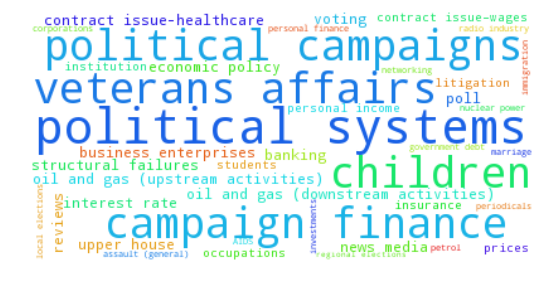

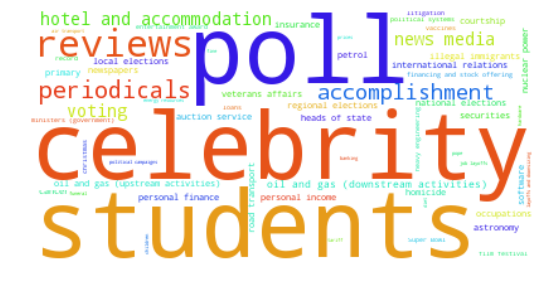

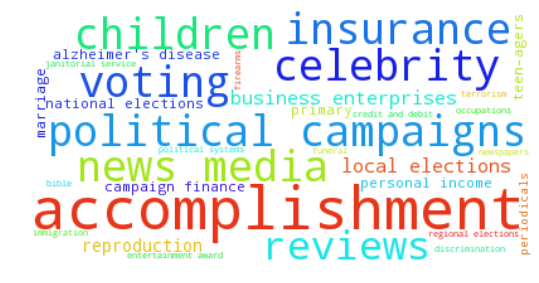

In [248]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

for cand in a:
#     print(cand)
    wordcloud = WordCloud(background_color="white").generate_from_frequencies(
        [(' '.join(k.split(' - ')[2:]), v) for k, v in cand.iteritems()])
    wordcloud = WordCloud(background_color="white").generate_from_frequencies([(' '.join(k.split(' - ')[2:]), v) for k, v in cand.iteritems()])
#     wordcloud = WordCloud(background_color="white").generate_from_frequencies([(' '.join(k.split(' - ')[1:]), v) for k, v in cand.iteritems()])
#     wordcloud = WordCloud(background_color="white").generate_from_frequencies([(' '.join(k.split(' - ')), v) for k, v in cand.iteritems()])
    plt.figure(figsize=(9, 12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()